In [3]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'F:\Data Projects\movies.csv')


In [4]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<AxesSubplot:>

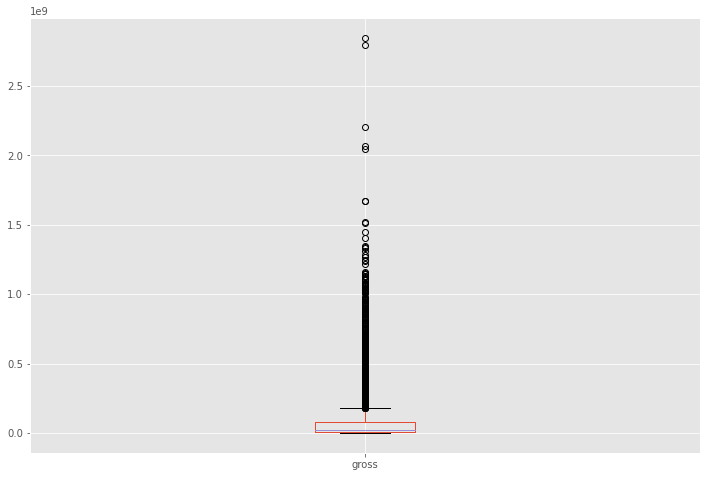

In [7]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [8]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [9]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<AxesSubplot:xlabel='gross', ylabel='budget'>

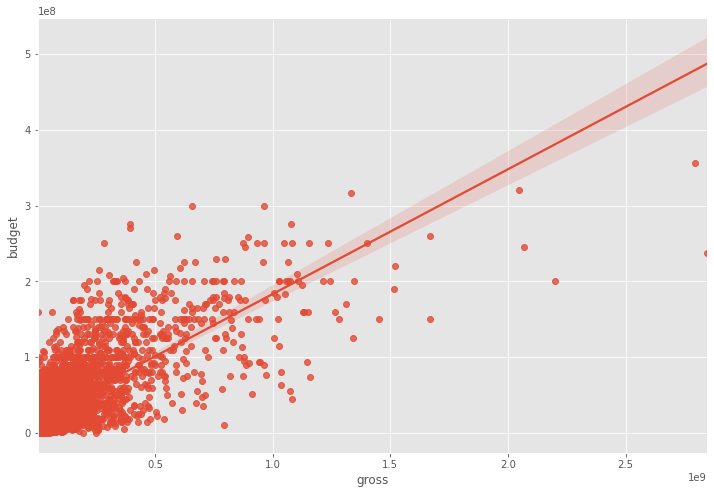

In [10]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

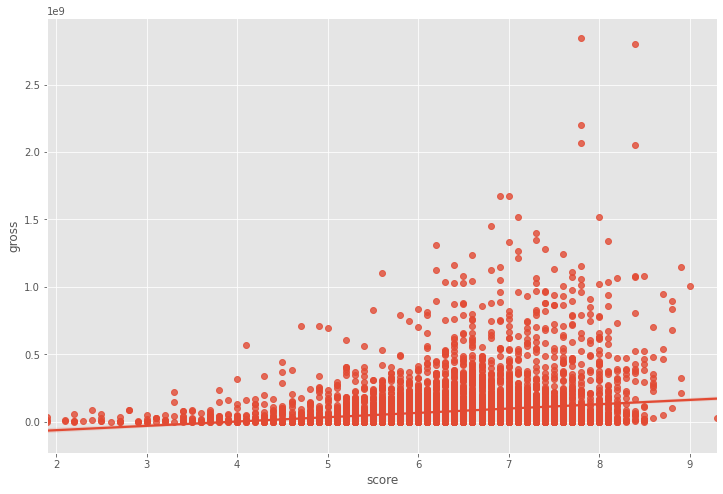

In [11]:
sns.regplot(x="score", y="gross", data=df)

In [12]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [13]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [14]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


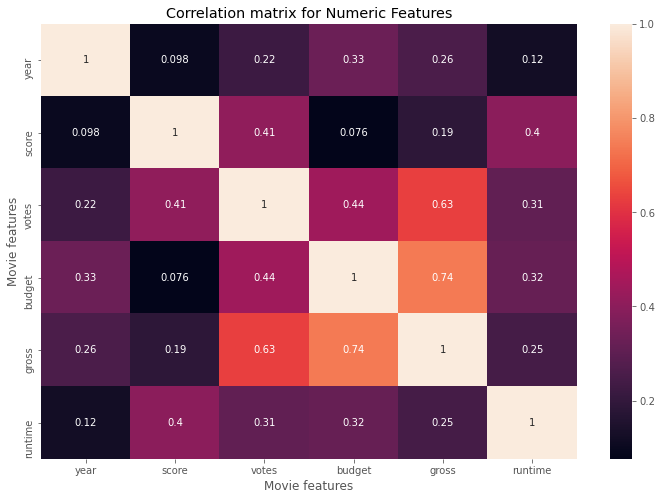

In [15]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [171]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.070302,-0.189282,0.480919,0.300018,0.978268,0.965431,-0.062005,0.370211,0.134315,0.009605,0.257396,0.955916,0.674068,-0.102399,0.020254,NaN,-0.099138
company,0.070302,1.000000,0.061540,0.155935,0.060236,0.101625,0.101876,0.000846,0.166275,-0.027840,0.031371,0.165490,0.089678,0.133796,0.105162,-0.008602,NaN,0.074285
country,-0.189282,0.061540,1.000000,-0.133631,-0.013013,-0.187801,-0.187762,0.124684,-0.051932,0.021056,0.012047,-0.054245,-0.181534,-0.146713,-0.004329,0.009149,NaN,-0.012557
director,0.480919,0.155935,-0.133631,1.000000,0.216499,0.507853,0.504802,-0.028938,0.292789,0.044193,0.036790,0.296325,0.497085,0.491595,0.030836,-0.009890,NaN,0.015255
genre,0.300018,0.060236,-0.013013,0.216499,1.000000,0.292627,0.288330,-0.024621,0.097809,0.031636,0.041309,0.098848,0.295037,0.230763,-0.003674,-0.017057,NaN,-0.003128
gross,0.978268,0.101625,-0.187801,0.507853,0.292627,1.000000,0.984267,-0.064561,0.422125,0.135257,0.013615,0.295385,0.974594,0.700464,-0.022809,0.019572,NaN,-0.026757
name,0.965431,0.101876,-0.187762,0.504802,0.288330,0.984267,1.000000,-0.065076,0.417623,0.130176,0.012255,0.292396,0.960618,0.695995,-0.023150,0.017110,NaN,-0.027272
rating,-0.062005,0.000846,0.124684,-0.028938,-0.024621,-0.064561,-0.065076,1.000000,-0.037900,0.035531,0.041838,0.000761,-0.060888,-0.056504,-0.013564,-0.010236,NaN,-0.020357
released,0.370211,0.166275,-0.051932,0.292789,0.097809,0.422125,0.417623,-0.037900,1.000000,0.070848,0.026386,0.211113,0.412720,0.315467,0.236153,-0.001076,NaN,0.225125
runtime,0.134315,-0.027840,0.021056,0.044193,0.031636,0.135257,0.130176,0.035531,0.070848,1.000000,0.054928,0.002983,0.137631,0.061594,0.011952,-0.005537,NaN,0.009247


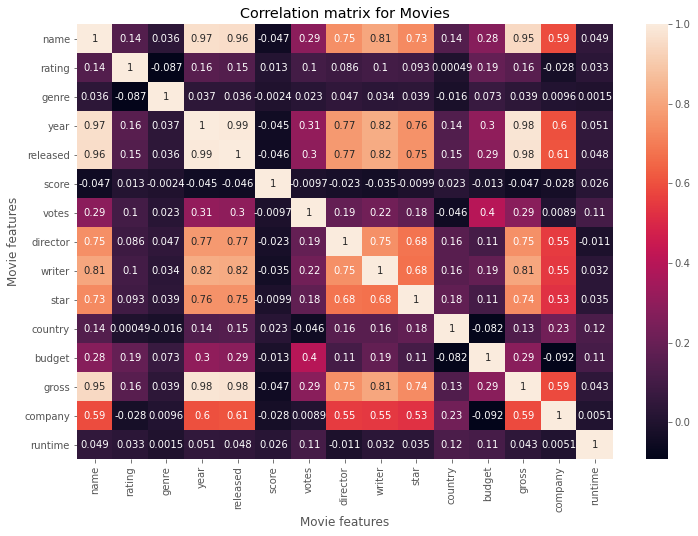

In [16]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [18]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.143938
         genre       0.036367
         year        0.965761
         released    0.959015
                       ...   
runtime  country     0.124154
         budget      0.112097
         gross       0.042978
         company     0.005137
         runtime     1.000000
Length: 225, dtype: float64


In [19]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   company   -0.092249
company  budget    -0.092249
genre    rating    -0.086723
rating   genre     -0.086723
budget   country   -0.082082
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [20]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company    0.527116
company   star       0.527116
          writer     0.546151
writer    company    0.546151
director  company    0.552258
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64


In [21]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [139]:
df['Year'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,NaN,NaN,2017
1871,0.0,Paramount Pictures,USA,Richard Benjamin,Comedy,18137661.0,Milk Money,PG-13,1994-08-31,110,5.5,Melanie Griffith,9880,John Mattson,1994,NaN,NaN,1994
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994,NaN,NaN,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994,NaN,NaN,1994
1855,0.0,Renn Productions,France,Patrice Ch�reau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,NaN,NaN,2015
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014,NaN,NaN,2014
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,NaN,NaN,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,NaN,NaN,2010


In [22]:


df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [23]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [24]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

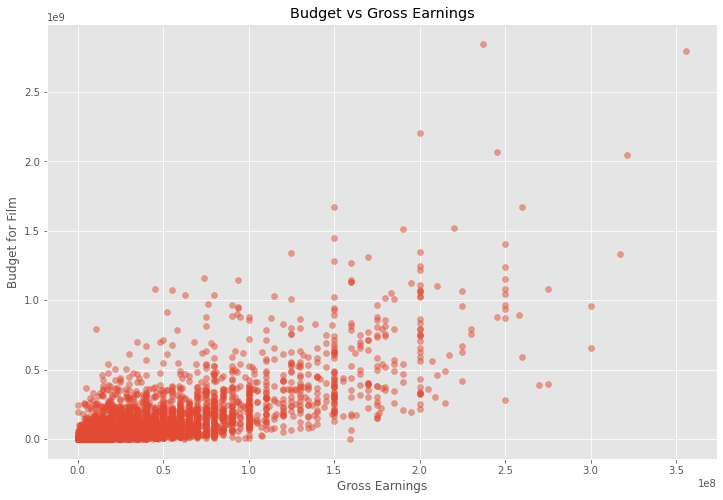

In [25]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [199]:
df


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [26]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [204]:
df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,-0.068548,NaN,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,-0.107676,NaN,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.226889,NaN,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,-0.164934,NaN,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.095361,NaN,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,-0.100710,NaN,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,-0.081830,NaN,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,-0.211311,NaN,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.996187,0.007605,NaN,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,-0.030870,NaN,0.088342


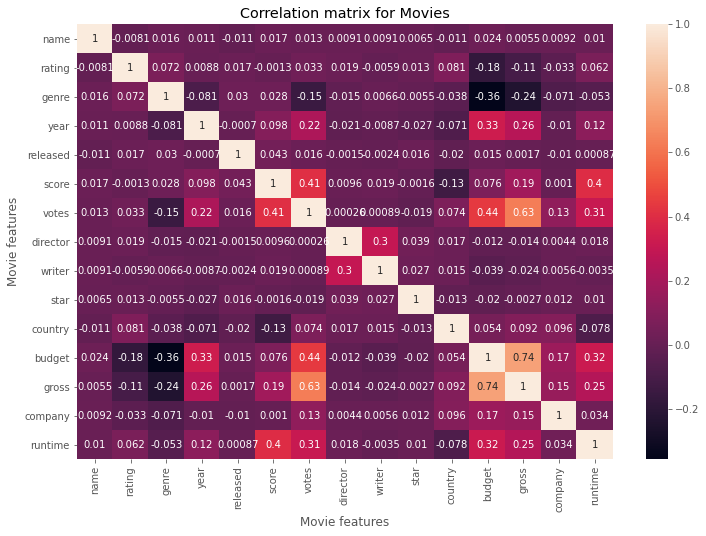

In [27]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [196]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,1393,16,1918,6,37757.0,1971,8,2398,120,6.7,1558,2411,2831,2016,NaN,NaN,31
1871,0.0,1680,54,2145,4,18137661.0,3332,7,667,110,5.5,1633,9880,1993,1994,NaN,NaN,8
1852,0.0,2062,54,1564,7,17193886.0,3346,6,687,114,6.4,1968,24126,4034,1994,NaN,NaN,8
1854,0.0,1544,54,645,4,1596700.0,1031,8,636,102,5.0,2342,4804,1885,1994,NaN,NaN,8
1855,0.0,1811,16,1968,3,2017346.0,4026,8,691,159,7.5,925,14377,123,1994,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,1491,54,1412,0,459005868.0,502,7,2239,141,7.4,2001,537832,2145,2015,NaN,NaN,29
6194,250000000.0,1582,34,2045,1,255119788.0,5420,7,2207,144,7.4,911,396797,1231,2014,NaN,NaN,28
4637,258000000.0,664,54,2317,0,336530303.0,4632,7,1615,139,6.2,2334,416842,3541,2007,NaN,NaN,21
5293,260000000.0,2119,54,1882,2,200821936.0,4877,6,1876,100,7.8,1536,325621,749,2010,NaN,NaN,24


In [194]:

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
6819,0.0,Les Productions du Tr�sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,NaN,NaN,2017
1871,0.0,Paramount Pictures,USA,Richard Benjamin,Comedy,18137661.0,Milk Money,PG-13,1994-08-31,110,5.5,Melanie Griffith,9880,John Mattson,1994,NaN,NaN,1994
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994,NaN,NaN,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994,NaN,NaN,1994
1855,0.0,Renn Productions,France,Patrice Ch�reau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994,NaN,NaN,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,250000000.0,Marvel Studios,USA,Joss Whedon,Action,459005868.0,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,NaN,NaN,2015
6194,250000000.0,New Line Cinema,New Zealand,Peter Jackson,Adventure,255119788.0,The Hobbit: The Battle of the Five Armies,PG-13,2014-12-17,144,7.4,Ian McKellen,396797,Fran Walsh,2014,NaN,NaN,2014
4637,258000000.0,Columbia Pictures,USA,Sam Raimi,Action,336530303.0,Spider-Man 3,PG-13,2007-05-04,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,NaN,NaN,2007
5293,260000000.0,Walt Disney Animation Studios,USA,Nathan Greno,Animation,200821936.0,Tangled,PG,2010-11-24,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,NaN,NaN,2010


<AxesSubplot:xlabel='rating', ylabel='gross'>

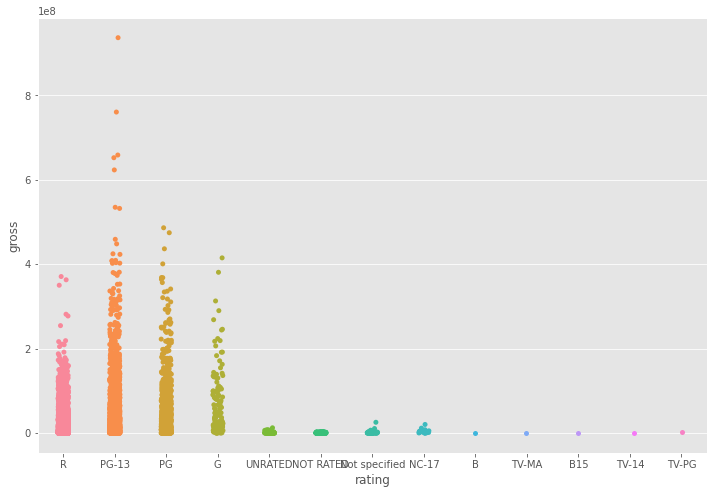

In [177]:
sns.stripplot(x="rating", y="gross", data=df)